In [ ]:
import time
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import YouTubeVideo

In [ ]:
!pip install keras_cv

In [ ]:
import keras_cv

You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.


# Data management

Data management is the process of collecting, storing, organizing, maintaining, and utilizing data effectively and efficiently.In ML, it is an important component, since data is the fuel of the algorithms.

## What is data?

Data refers to a collection of facts, information, or statistics that are often represented in a numerical or digital form. Data can be in various forms, such as text, images, audio, video, or any other format that can be stored and analyzed using digital technologies.

Data is an important resource for decision-making in many fields, including business, science, healthcare, education, and government. With the advent of big data and advanced analytics technologies, the analysis and interpretation of data have become increasingly important for organizations to gain insights into patterns, trends, and behaviors that can inform decision-making and drive innovation.

# Structure vs Unstructured Data 

**Structured data refers** to data that is organized and formatted in a specific way, typically within a fixed schema. Structured data can be easily analyzed, searched, and processed using algorithms or software tools. Examples of structured data include spreadsheets, databases, and tables.

On the other hand, **unstructured data** refers to data that is not organized in a specific way and does not have a fixed schema. Unstructured data can be more difficult to analyze and process compared to structured data because it lacks a consistent format. Examples of unstructured data include text documents, social media posts, audio and video recordings, and images.

![picture](https://www.bigdataframework.org/wp-content/uploads/2019/01/data-structures-1-1024x349.png)

# How data is generated?

## Simulations

Simulation involves modeling real-world phenomena and generating data based on those models. For example, a simulation could be used to generate synthetic weather data based on historical patterns and statistical distributions



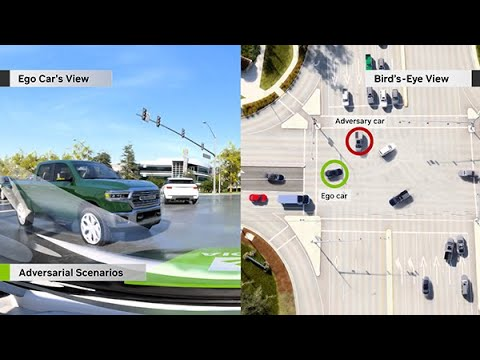

In [ ]:
YouTubeVideo('BXf9xTR6hJo', width=600)

**Example using Simpy**

SimPy is a process-based discrete-event simulation framework based on standard Python.

Processes in SimPy are defined by Python generator functions and may, for example, be used to model active components like customers, vehicles or agents. SimPy also provides various types of shared resources to model limited capacity congestion points (like servers, checkout counters and tunnels).

Simulations can be performed “as fast as possible”, in real time (wall clock time) or by manually stepping through the events.

![picture](https://simpy.readthedocs.io/en/latest/_images/simpy-logo-small.png)

In [ ]:
!pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import simpy

def queue_simulation(env, num_servers, arrival_rate, service_rate, sim_time):
    """
    Simulate a queueing system with a given number of servers.

    Parameters:
    env (simpy.Environment): SimPy environment object.
    num_servers (int): Number of servers in the queue.
    arrival_rate (float): Arrival rate of customers per hour.
    service_rate (float): Service rate of the servers per hour.
    sim_time (float): Simulation time in hours.

    Returns:
    float: Average waiting time of customers in the queue.
    """
    queue = simpy.Resource(env, capacity=num_servers)
    waiting_times = []

    # generates customer arrivals at a rate specified by the arrival_rate parameter.
    def customer_arrival():
        while True:
            interarrival_time = 1 / arrival_rate
            yield env.timeout(interarrival_time)
            env.process(customer_service())

    # represents the service provided by the servers. It requests the Resource object to access a server, 
    # simulates the service time, and calculates the waiting time for the customer.
    def customer_service():
        with queue.request() as req:
            arrival_time = env.now
            yield req
            service_time = 1 / service_rate
            yield env.timeout(service_time)
            departure_time = env.now
            waiting_time = departure_time - arrival_time
            waiting_times.append(waiting_time)

    env.process(customer_arrival())
    env.run(until=sim_time * 60 * 60)  # convert sim_time to hours
    return sum(waiting_times) / len(waiting_times)

env = simpy.Environment()

num_servers = 2
arrival_rate = 100  # customers per hour
service_rate = 5  # customers per hour
sim_time = 8  # hours

avg_waiting_time = queue_simulation(env, num_servers, arrival_rate, service_rate, sim_time)

print(f"Average waiting time: {avg_waiting_time:.2f} hours")

Average waiting time: 12960.02 hours


This function takes in five arguments: env (a SimPy environment object), num_servers (the number of servers in the queue), arrival_rate (the arrival rate of customers), service_rate (the service rate of the servers), and sim_time (the simulation time). It returns the average waiting time of customers in the queue.

The function creates a Resource object to represent the queue with a capacity equal to the number of servers. It then defines two generator functions using the def keyword: customer_arrival() and customer_service(). The customer_arrival() function generates customer arrivals at a rate specified by the arrival_rate parameter. The customer_service() function represents the service provided by the servers. It requests the Resource object to access a server, simulates the service time, and calculates the waiting time for the customer.

The function then initializes an empty list waiting_times to store the waiting times of customers in the queue. It creates a Process object to represent the arrival of customers, and starts the simulation using the run() method of the SimPy environment object.

Finally, the function calculates and returns the average waiting time of customers in the queue by dividing the sum of the waiting times by the total number of customers.

**Random sampling:** Random sampling involves generating data by randomly selecting values from a known distribution. For example, synthetic data could be generated by randomly selecting values from a Gaussian distribution to mimic the statistical properties of a real dataset.

[Research Sampling Methods](https://www.projectguru.in/what-are-quantitative-research-sampling-methods/)

![picture](https://i0.wp.com/www.projectguru.in/wp-content/uploads/2020/02/1-2.jpg?resize=624%2C438&ssl=1)

In [ ]:
import random

class Person:
    def __init__(self, name, age, gender):
        self.name = name
        self.age = age
        self.gender = gender

    def __repr__(self) -> str:
        return f"{self.name} - {self.gender}"

    def __str__(self) -> str:
        return self.gender

def random_sampling(data, n_samples, method='simple_random'):
    """
    Perform random sampling on a list of Person objects.

    Parameters:
    data (list): The list of Person objects to sample from.
    n_samples (int): The number of samples to draw.
    method (str): The random sampling method to use.
                  Options: 'simple_random', 'systematic', 'stratified', 'cluster'.

    Returns:
    list: A list of n_samples randomly selected Person objects from the dataset.
    """
    if method == 'simple_random':
        # random picking n_samples from the data
        return random.sample(data, n_samples)

    elif method == 'systematic':
        # selects the first item randomly, then selects every k-th item thereafter, 
        # where k is calculated as len(data) // n_samples.
        k = len(data) // n_samples
        start = random.randint(0, k-1)
        print(k)
        return [data[i] for i in range(start, len(data), k)][:n_samples]

    elif method == 'stratified':
        strata = {}
        for person in data:
            if person.gender not in strata:
                strata[person.gender] = [person]
            else:
                strata[person.gender].append(person)

        sample = []
        for stratum in strata.values():
            n_stratum = len(stratum)
            n_sample_stratum = round(n_samples * n_stratum / len(data))
            sample += random.sample(stratum, n_sample_stratum)

        return sample

    elif method == 'cluster':
        clusters = {}
        for person in data:
            # we create the cluster based on the age
            if person.age not in clusters:
                clusters[person.age] = [person]
            else:
                clusters[person.age].append(person)

        sample = []
        # the we randomly select a person for each cluster
        for cluster in random.sample(list(clusters.keys()), n_samples):
            sample += random.sample(clusters[cluster], 1)

        return sample

    else:
        raise ValueError(f"Invalid method: {method}")

In [ ]:
people = [
    Person('Alice', 25, "F"),
    Person('Kate', 25, "F"),
    Person('Lily', 25, "F"),
    Person('Bob', 35, "M"),
    Person('Charlie', 45, "M"),
    Person('Dave', 35, "F"),
    Person('Eve', 65, "F")
]

This function takes in a dataset (data), the number of samples to draw (n_samples), and a sampling method (method) as input parameters. The function then performs the specified random sampling technique on the dataset and returns a list of n_samples randomly selected items.

The function currently supports four different random sampling methods:

**Simple random sampling (method='simple_random'):** randomly selects n_samples items from the dataset without any restrictions.

In [ ]:
n_samples = 2
method = 'simple_random'

sample = random_sampling(people, n_samples, method)
for person in sample:
    print(person.name, person.age, person.gender)

Charlie 45 M
Kate 25 F


**Systematic sampling (method='systematic'):** selects the first item randomly, then selects every k-th item thereafter, where k is calculated as len(data) // n_samples.


In [ ]:
n_samples = 2
method = 'systematic'

sample = random_sampling(people, n_samples, method)
for person in sample:
    print(person.name, person.age, person.gender)

3
Kate 25 F
Charlie 45 M



**Stratified sampling (method='stratified'):** divides the dataset into strata based on a given criterion (in this example, the first element of each item), and then selects a proportional number of samples from each stratum based on its size.

In [ ]:
n_samples = 4
method = 'stratified'

sample = random_sampling(people, n_samples, method)
for person in sample:
    print(person.name, person.age, person.gender)

Alice 25 F
Lily 25 F
Kate 25 F
Charlie 45 M



**Cluster sampling (method='cluster'):** divides the dataset into clusters based on a given criterion (in this example, the second element of each item), and then randomly selects n_samples clusters and one item from each selected cluster.

In [ ]:
n_samples = 2
method = 'cluster'

sample = random_sampling(people, n_samples, method)
for person in sample:
    print(person.name, person.age, person.gender)

Bob 35 M
Kate 25 F


## The age of generative AI

Generative models: Generative models involve training machine learning algorithms to generate new data based on patterns in existing data. For example, a generative model could be trained on a set of real images to generate new, synthetic images that have similar visual characteristics.

## Example using GANS

![Picture](https://www.tensorflow.org/tutorials/generative/images/gan1.png)

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

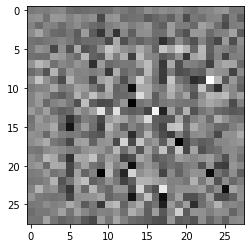

In [ ]:
generator = make_generator_model()
noise = tf.random.normal([1, 100]) # latent represnetation
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00062922]], shape=(1, 1), dtype=float32)


In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

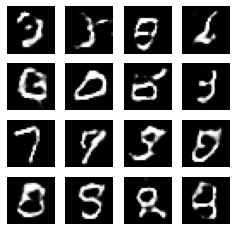

In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

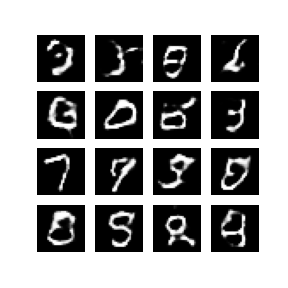

In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

display_image(EPOCHS)

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

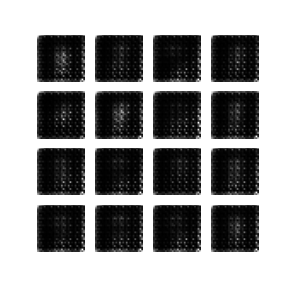

In [ ]:
from IPython.display import Image
Image(anim_file)

## Example Using Diffusion Models 

![Picture](https://lilianweng.github.io/posts/2021-07-11-diffusion-models/unCLIP.png)

In [ ]:
def plot_images(images):
    """
    Plot images
    :param images:
    :return:
    """
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
50/50 [==============================] - 45s 316ms/step


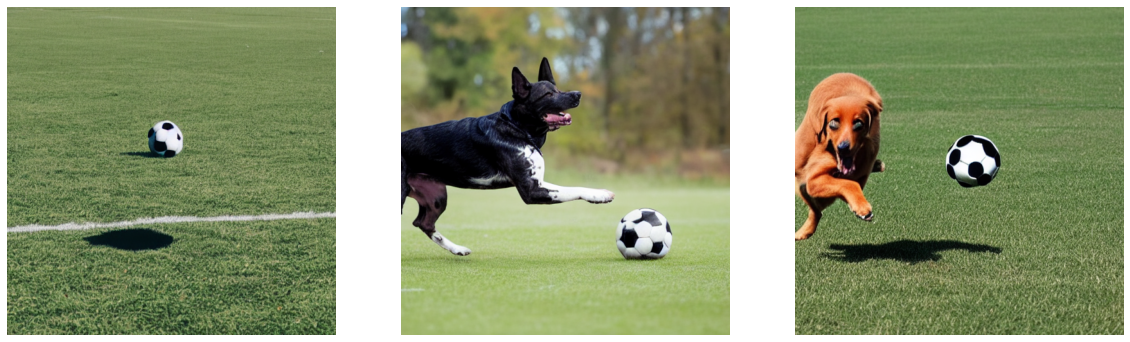

In [ ]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)
images = model.text_to_image("a dog playing soccer",batch_size=3)
plot_images(images)

**Data augmentation:** Data augmentation involves manipulating existing data to create new, synthetic data. For example, synthetic data could be generated by applying random rotations, translations, or scaling to existing images.


In [ ]:
import tensorflow_datasets as tfds

IMAGE_SIZE = (150, 150)
AUTOTUNE = tf.data.AUTOTUNE
INTERPOLATION = "bilinear"

dataset, info = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)
num_classes = info.features["label"].num_classes


def to_dict(image, label):
    image = tf.image.resize(image, IMAGE_SIZE)
    image = tf.cast(image, tf.float32)
    label = tf.one_hot(label, num_classes)
    return {"images": image, "labels": label}

def prepare_dataset(dataset, split):
    if split == "train":
        return (
            dataset.shuffle(10 * BATCH_SIZE)
            .map(to_dict, num_parallel_calls=AUTOTUNE)
            .batch(BATCH_SIZE)
        )
    if split == "test":
        return dataset.map(to_dict, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE)

def load_dataset(split="train"):
    return prepare_dataset(dataset[split], split)

def visualize_dataset(dataset, title):
    plt.figure(figsize=(6, 6)).suptitle(title, fontsize=18)
    for i, samples in enumerate(iter(dataset.take(9))):
        images = samples["images"]
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()


train_dataset = load_dataset()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete7R1GVY/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


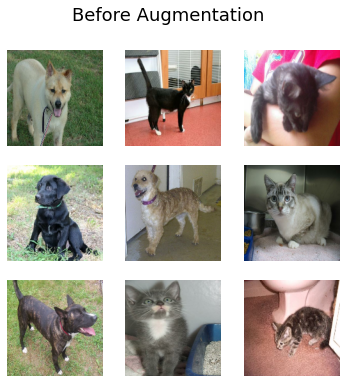

In [ ]:
visualize_dataset(train_dataset, title="Before Augmentation")

In [ ]:
rand_augment = keras_cv.layers.RandAugment(
    value_range=(0, 255),
    augmentations_per_image=3,
    magnitude=0.3,
    magnitude_stddev=0.2,
    rate=0.5,
)

augmenter = keras_cv.layers.Augmenter(
  layers=[
      keras_cv.layers.RandomFlip(),
      keras_cv.layers.RandAugment(value_range=(0, 255)),
      keras_cv.layers.CutMix(),
      keras_cv.layers.MixUp()
    ]
)
def apply_rand_augment(inputs):
    inputs["images"] = rand_augment(inputs["images"])
    return inputs

def augment_data(inputs):
  outputs = augmenter(inputs)
  return outputs['images'], outputs['labels']

train_dataset = load_dataset().map(apply_rand_augment, num_parallel_calls=AUTOTUNE)

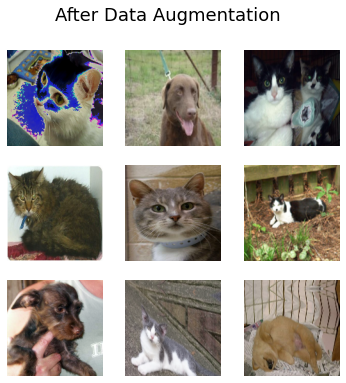

In [ ]:
visualize_dataset(train_dataset, title="After Data Augmentation")

## How is data stored?

**Filesystem storage:** data is organized and managed on a storage device such as a hard drive, solid-state drive (SSD), or flash drive. It provides a hierarchical structure of directories (also known as folders) and files, which can be accessed and manipulated by the operating system.
The most common file systems used in modern operating systems are NTFS (New Technology File System) on Windows and APFS (Apple File System) on macOS, but there are many other file systems, including ext4, FAT32, and HFS+. 
The choice of file system depends on factors such as the operating system, the type of storage device, and the intended use of the storage device.system and applications.


In [ ]:
def write_and_read_file(file_path, text):
    """
    Write text to a file and read it back.

    Parameters:
    file_path (str): The path to the file.
    text (str): The text to write to the file.

    Returns:
    The contents of the file.
    """
    # Write the text to the file
    with open(file_path, 'w') as file:
        file.write(text)

    # Read the contents of the file
    with open(file_path, 'r') as file:
        contents = file.read()

    return contents


file_path = 'my_file.txt'
text = 'Hello, world!'
contents = write_and_read_file(file_path, text)
print(contents)

Hello, world!


In [ ]:
from pathlib import Path


for file_system_path in Path("").glob("*.txt"):
    print(file_system_path)

my_file.txt


**Object Storage:**  The object storage is an API over the filesystem. Its fundamental unit is an object. Data is usually store in binary format (an image, a sound file, a text file, etc.). In object storage, each object is given a unique identifier, known as an object ID, which can be used to retrieve and access the object. The object ID can be a simple string or a complex hash, depending on the object storage system.
Object storage systems are designed for massive scalability and can store large amounts of unstructured data, such as multimedia files, documents, and social media data. It is the predefined storage model adopted by cloud platforms.
Some popular object storage systems include Amazon S3, Google Cloud Storage, and Microsoft Azure Blob Storage.
Data is generally accessed by using code API’s


In [ ]:
PROJECT_NAME = "uao-coure"
BUCKET_NAME = "uao-coure-images"

In [ ]:
from googleapiclient.discovery import build
from google.cloud import storage
from google.oauth2 import service_account

def upload_file_to_bucket(bucket_name, file_path, destination_blob_name, credentials=None):
    """Uploads a file to the given GCP bucket."""
    # Initialize a client
    if credentials:
        storage_client = storage.Client(PROJECT_NAME, credentials=credentials)
    else:
        storage_client = storage.Client(PROJECT_NAME)
    # Get the bucket
    bucket = storage_client.bucket(bucket_name)
    # Create a blob object
    blob = bucket.blob(destination_blob_name)
    # Upload the file to the bucket
    blob.upload_from_filename(file_path)
    print(f'File {file_path} uploaded to {destination_blob_name} in bucket {bucket_name}.')


def list_files_in_bucket(bucket_name):
    """Lists all the files in the given GCP bucket."""
    # Initialize a client
    if credentials:
        storage_client = storage.Client(PROJECT_NAME, credentials=credentials)
    else:
        storage_client = storage.Client(PROJECT_NAME)
    # Get the bucket
    bucket = storage_client.bucket(bucket_name)
    # List the files in the bucket
    files = list(bucket.list_blobs())
    # Print the file names
    print(f'Files in {bucket_name}:')
    for file in files:
        print(file.name)

In [ ]:
credentials = service_account.Credentials.from_service_account_file("service-account.json")
    
for file_path in Path("").glob("*.txt"):
    upload_file_to_bucket(BUCKET_NAME, file_path, file_path.name, credentials=credentials)

File my_file.txt uploaded to my_file.txt in bucket uao-coure-images.


In [ ]:
list_files_in_bucket(BUCKET_NAME)

Files in uao-coure-images:
June_odd-eyed-cat.jpg
cat.jpeg
my_file.txt
prisma-labs-lensa-ai.jpg


Reading prisma-labs-lensa-ai.jpg from GCP: 100%|██████████| 194k/194k [00:00<00:00, 4.43MB/s]


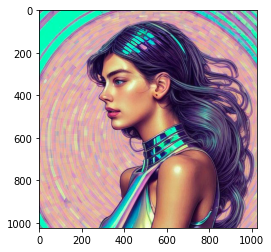

In [ ]:
from tqdm import tqdm
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pylab as plt

def read_image_from_gcp(bucket_name, blob_name):
     # Initialize a client
    if credentials:
        storage_client = storage.Client(PROJECT_NAME, credentials=credentials)
    else:
        storage_client = storage.Client(PROJECT_NAME)
    # Get the bucket
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.get_blob(blob_name)

    file_size = blob.size
    status_msg = f"Reading {blob_name} from GCP"
    with BytesIO() as f:
        with tqdm.wrapattr(
            f, "write", total=file_size, desc=status_msg
        ) as file_obj:
            # blob.download_to_file is deprecated
            storage_client.download_blob_to_file(blob, file_obj)
        image = Image.open(f)
        return np.asarray(image)

img = read_image_from_gcp(BUCKET_NAME, "prisma-labs-lensa-ai.jpg")
plt.imshow(img)
plt.show()

**Databases:**  organized collections of data that are designed to be easily accessed, managed, and updated. It allow users to store and retrieve data efficiently and securely.
A database typically consists of one or more tables, which are collections of data organized into rows and columns. Each table represents a specific type of data, such as customer information or product inventory. Within a table, each row represents a unique record or instance of the data, and each column represents a specific attribute or characteristic of the data.
Databases are typically managed by a database management system (DBMS), which provides tools and interfaces for creating, modifying, and querying the data. The most commonly used DBMSs are relational database management systems (RDBMS), such as MySQL, Oracle, and Microsoft SQL Server, which use the SQL (Structured Query Language) programming language for managing and querying data.


## How data is presented to the model?

Data is presented to machine learning (ML) algorithms in the form of a dataset. A dataset is a collection of input data and output labels, where the input data represents the features or characteristics of the data, and the output labels represent the target variable or the value that the ML algorithm is trying to predict.

In supervised learning, the dataset is labeled, which means that each input data point has a corresponding output label. In unsupervised learning, the dataset is unlabeled, which means that there are no output labels.

The input data is typically represented as a 2D array or matrix, where each row represents a data point or instance, and each column represents a feature or attribute of that data point. The output labels are represented as a separate 1D array or vector.

Before presenting the data to ML algorithms, it is often preprocessed and cleaned to ensure that it is in a suitable format for analysis. This may involve removing missing values, scaling the data to have zero mean and unit variance, encoding categorical variables, and performing other data transformations.

Once the data is preprocessed and cleaned, it can be split into training, validation, and testing sets, which are used to train and evaluate the ML model. The training set is used to train the model, the validation set is used to tune hyperparameters and assess the performance of the model during training, and the testing set is used to evaluate the final performance of the model on unseen data.

PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding) are both popular dimensionality reduction techniques used in machine learning and data analysis. However, they differ in several ways:

- **Linear vs Non-linear:** PCA is a linear dimensionality reduction technique, which means it works well for linearly separable data, but may not work well for non-linearly separable data. t-SNE, on the other hand, is a non-linear technique, which means it can capture complex relationships between data points.

- **Global vs Local:** PCA aims to capture the global structure of the data, which means it tries to preserve the overall shape of the data, but may not capture local relationships between data points. t-SNE, on the other hand, aims to capture the local structure of the data, which means it tries to preserve the local relationships between data points, but may not preserve the overall shape of the data.

- **Computational Complexity:** PCA is computationally less complex than t-SNE, which means it can handle larger datasets more efficiently. t-SNE, on the other hand, can be computationally expensive, especially for large datasets.

- **Interpretability:** PCA produces new features that are linear combinations of the original features, which means they can be easily interpreted. t-SNE, on the other hand, produces new features that are non-linear combinations of the original features, which makes them difficult to interpret.

In summary, PCA is a fast and efficient linear dimensionality reduction technique that preserves the global structure of the data, while t-SNE is a powerful non-linear technique that preserves the local structure of the data but can be computationally expensive. The choice between PCA and t-SNE depends on the nature of the data and the specific task at hand.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

digits = load_digits()
images = digits.images
labels = digits.target

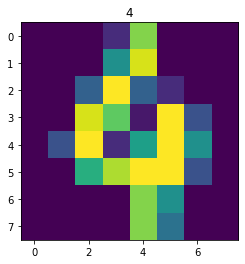

In [ ]:
img = images[100]
label = labels[100]

plt.imshow(img)
plt.title(label)
plt.show()

In [ ]:
print(img.ndim)

2


In [ ]:
img.ndim

2

In [ ]:
img.flatten().ndim

1

In [ ]:
img.reshape(img.shape[0], -1)

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

In [ ]:
def get_matplotlib_colors(num_colors):
    """
    Returns a list of colors for use with matplotlib.
    
    Parameters:
    num_colors (int): The number of colors required.
    
    Returns:
    A list of `num_colors` colors for use with matplotlib.
    """
    # Get a list of all named colors in matplotlib
    named_colors = list(mcolors.CSS4_COLORS.keys())
    
    # Select `num_colors` colors at regular intervals from the named colors list
    num_named_colors = len(named_colors)
    step = num_named_colors // num_colors
    selected_colors = [named_colors[i] for i in range(0, num_named_colors, step)][:num_colors]
    
    return selected_colors

In [ ]:
get_matplotlib_colors(2)

['aliceblue', 'lightpink']

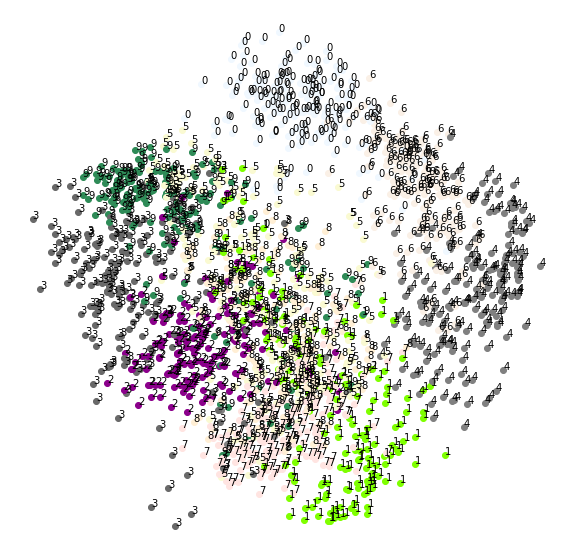

In [ ]:
def plot_images(images_list, labels_list, method = "tsne"):
    """
    Plots images using t-SNE or PCA algorithm.
    
    Parameters:
    images_list (list): List of image arrays.
    labels_list (list): List of labels for each image in images_list.
    """
    # Convert list of images into a 2D numpy array
    images_arr = np.array(images_list)
    
    # Flatten each image into a 1D numpy array
    images_flattened = images_arr.reshape(images_arr.shape[0], -1)

    unique_labels = np.unique(labels_list)
    unique_labels_colors =  get_matplotlib_colors(len(unique_labels))
    
    colors_map = {unique_labels[i]: c for i, c in enumerate(unique_labels_colors)}
    
    if method == "tsne":
        tsne = TSNE(n_components=2, random_state=0)
        projected_images = tsne.fit_transform(images_flattened)
    else:
        pca = PCA(n_components=2)
        projected_images = pca.fit_transform(images_flattened)

    num_images = projected_images.shape[0]
    # Plot each image with its corresponding label
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        
        curr_image = projected_images[i,0]
        curr_label = labels_list[i]
        x, y = projected_images[i, 0], projected_images[i, 1]
        plt.scatter(x, y, c=colors_map[curr_label], cmap=plt.cm.jet)
        plt.text(x,y,curr_label)

    plt.axis('off')
    plt.show()



plot_images(images, labels, method = "PCA")

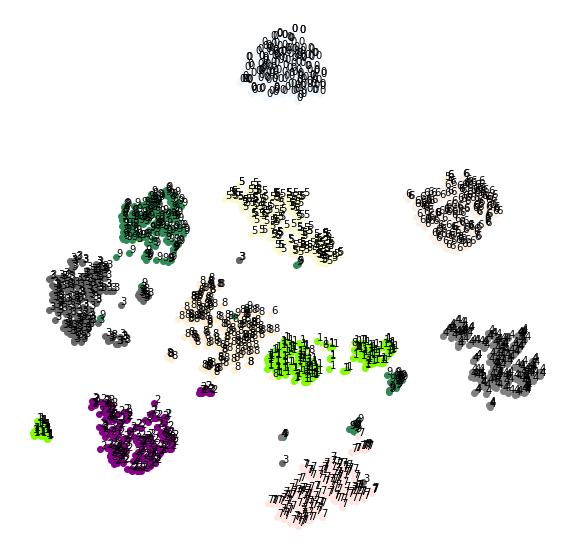

In [ ]:
plot_images(images, labels, method = "tsne")

![picture](https://partee.io/images/posts/vector-embeddings/distance-metrics.png)

In [ ]:
def vector_distance(vector1, vector2, metric='euclidean'):
    """
    Computes the distance between two vectors.

    Parameters:
        vector1 (ndarray): The first vector.
        vector2 (ndarray): The second vector.
        metric (str): The distance metric to use. Can be 'euclidean', 'manhattan', or 'cosine'. Defaults to 'euclidean'.

    Returns:
        float: The distance between the two vectors.
    """
    if metric == 'euclidean':
        distance = np.sqrt(np.sum(np.square(vector1 - vector2)))
    elif metric == 'manhattan':
        distance = np.sum(np.abs(vector1 - vector2))
    elif metric == 'cosine':
        unit_vector1 = vector1 / np.linalg.norm(vector1)
        unit_vector2 = vector2 / np.linalg.norm(vector2)
        distance = 1 - np.dot(unit_vector1, unit_vector2)
    else:
        raise ValueError("Invalid metric. Valid metrics are 'euclidean', 'manhattan', or 'cosine'.")

    return distance.round(2)

In [ ]:
images = digits.images
labels = digits.target

In [ ]:
def image_to_vector(image: np.array):
    """
    Convert image to vector.
    """
    return image.flatten()

data = {}
for image, label in zip(images, labels):
    img_vector = image_to_vector(image)
    if label not in data:
        data[label] = [img_vector]
    else:
        data[label].append(img_vector)

In [ ]:
sample_num_9 = data[9][0]
sample_num_2 = data[2][0]

In [ ]:
vector_distance(
    sample_num_9,
    sample_num_9,
    metric = 'cosine'
)

-0.0

In [ ]:
vector_distance(
    sample_num_9,
    sample_num_2,
    metric = 'cosine'
)

0.35

In [ ]:
sample_num_9_1 = data[9][0]
sample_num_9_2 = data[9][2]

In [ ]:
vector_distance(
    sample_num_9_1,
    sample_num_9_2,
    metric = 'cosine'
)

0.19